In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy.builtins import *
from statsmodels.iolib.summary2 import summary_col


In [25]:
esg2017 = pd.read_csv('sp_500_esg_scores_2017.csv')
esg2018 = pd.read_csv('sp_500_esg_scores_2018.csv')

Removes firms from financial sectors as a leverage level that is normal for a financial firm could be a sign of distress for a non financial firm. 

In [26]:
allFirm = pd.read_csv('sp_500_sector.csv')
#combine esg dataframes with their sectors to remove data not used.
esg2017['GICS Sector Name'] = allFirm['GICS Sector Name']
esg2018['GICS Sector Name'] = allFirm['GICS Sector Name']
esg2017 = esg2017[esg2017['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
esg2018 = esg2018[esg2018['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
filteredFirms = allFirm
filteredFirms = filteredFirms[filteredFirms['GICS Sector Name'] != 'Financials'].reset_index(drop=True)


In [27]:

esgScores = pd.DataFrame(columns = ['Instrument','2017','2018'])
esgScores['Instrument'] = filteredFirms['Instrument']
for i in esgScores.index:
    esgScores.at[i,'2017'] = esg2017.at[i,'ESG Score']
    esgScores.at[i,'2018'] = esg2018.at[i,'ESG Score']
esgScores[['2017','2018']] = esgScores[['2017','2018']].astype(float).round(2)
esgScores





,Instrument,2017,2018
0,MMM,87.23,85.98
1,AOS,40.23,41.06
2,ABT,81.99,77.68
3,ABBV.K,79.49,75.54
4,ABMD.O,25.89,20.55
...,...,...,...
431,XYL,77.16,73.76
432,YUM,78.81,82.36
433,ZBRA.O,29.38,24.93
434,ZBH,40.61,45.58


Individual E, S, and G data from sample from years 2017-2018

In [28]:
individualESG = pd.DataFrame(columns = ['Instrument','2017 (E)','2017 (S)','2017 (G)','2018 (E)','2018 (S)','2018 (G)'])
individualESG['Instrument'] = filteredFirms['Instrument']
for i in individualESG.index:
    individualESG.at[i,'2017 (E)'] = esg2017.at[i,'Environmental Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2017 (S)'] = esg2017.at[i,'Social Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2017 (G)'] = esg2017.at[i,'Governance Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2018 (E)'] = esg2018.at[i,'Environmental Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2018 (S)'] = esg2018.at[i,'Social Pillar Score'].astype(float).round(2)
    individualESG.at[i,'2018 (G)'] = esg2018.at[i,'Governance Pillar Score'].astype(float).round(2)

Remove row with NaN data for preprocessing

In [29]:

individualESG.dropna(inplace = True)   
individualESG


,Instrument,2017 (E),2017 (S),2017 (G),2018 (E),2018 (S),2018 (G)
0,MMM,85.42,97.53,73.13,87.34,96.87,66.27
1,AOS,35.01,34.79,53.65,37.57,32.52,56.45
2,ABT,75.61,82.55,84.25,75.89,81.24,73.84
3,ABBV.K,61.45,90.89,75.68,67.19,91.61,57.64
4,ABMD.O,0.0,32.92,28.72,0.0,32.39,14.55
...,...,...,...,...,...,...,...
431,XYL,72.91,72.56,88.28,73.32,67.88,82.01
432,YUM,80.82,85.49,66.97,82.55,85.81,77.03
433,ZBRA.O,5.43,38.76,50.37,1.57,36.5,42.78
434,ZBH,8.69,59.39,30.77,12.61,59.06,43.22


In [30]:
#removing unused data from dataframe
spIncome = pd.read_csv('sp_500_income.csv')
totalAssets = pd.read_csv('sp_500_total_assets_reported.csv')
marketCap = pd.read_csv('sp_500_company_market_capitalization.csv')
investmentReturn = pd.read_csv('sp_500_ytd_total_return.csv')
totalDebt = pd.read_csv('sp_500_total_debt.csv')
spIncome['GICS Sector Name'] = allFirm['GICS Sector Name']
totalAssets['GICS Sector Name'] = allFirm['GICS Sector Name']
marketCap['GICS Sector Name'] = allFirm['GICS Sector Name']
investmentReturn['GICS Sector Name'] = allFirm['GICS Sector Name']
totalDebt['GICS Sector Name'] = allFirm['GICS Sector Name']
spIncome = spIncome[spIncome['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
totalAssets = totalAssets[totalAssets['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
marketCap = marketCap[marketCap['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
investmentReturn = investmentReturn[investmentReturn['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
totalDebt = totalDebt[totalDebt['GICS Sector Name'] != 'Financials'].reset_index(drop=True)
#creating samples from 2017-2018
sample2017 = pd.DataFrame(columns = ['Instrument','ROA',"log(TobinQ)",'ROI','Size','Leverage'])
sample2018 = pd.DataFrame(columns = ['Instrument','ROA',"log(TobinQ)",'ROI','Size','Leverage'])
sample2017['Instrument'] = filteredFirms['Instrument']
sample2018['Instrument'] = filteredFirms['Instrument']
for i in filteredFirms.index:
    #2017
    sample2017.at[i,'ROA'] = (spIncome.at[i,'2017']/totalAssets.at[i,'2017']).astype(float).round(2)
    sample2017.at[i,"log(TobinQ)"] = np.log((marketCap.at[i,'2017']/totalAssets.at[i,'2017'])).astype(float).round(2)
    sample2017.at[i,'ROI'] = (investmentReturn.at[i,'2017']/100).astype(float).round(2)
    sample2017.at[i,'Size'] = (np.log(totalAssets.at[i,'2017'])).astype(float).round(2)
    sample2017.at[i,'Leverage'] = (totalDebt.at[i,'2017']/totalAssets.at[i,'2017']).astype(float).round(2)
    #2018
    sample2018.at[i,'ROA'] = (spIncome.at[i,'2018']/totalAssets.at[i,'2018']).astype(float).round(2)
    sample2018.at[i,"log(TobinQ)"] = np.log((marketCap.at[i,'2018']/totalAssets.at[i,'2018'])).astype(float).round(2)
    sample2018.at[i,'ROI'] = (investmentReturn.at[i,'2018']/100).astype(float).round(2)
    sample2018.at[i,'Size'] = (np.log(totalAssets.at[i,'2018'])).astype(float).round(2)
    sample2018.at[i,'Leverage'] = (totalDebt.at[i,'2018']/totalAssets.at[i,'2018']).astype(float).round(2)


Merging dataframes based on Instrument

In [31]:
mergedDf = pd.merge(individualESG, sample2017, on = 'Instrument')
mergedDf = mergedDf.rename(columns={"ROA":"ROA_2017","log(TobinQ)":"log(TobinQ)_2017","ROI":"ROI_2017","Size":"Size_2017","Leverage":"Leverage_2017"})

mergedDf = pd.merge(mergedDf, sample2018, on = 'Instrument')
mergedDf = mergedDf.rename(columns={"ROA":"ROA_2018","log(TobinQ)":"log(TobinQ)_2018","ROI":"ROI_2018","Size":"Size_2018","Leverage":"Leverage_2018"})

mergedDf

,Instrument,2017 (E),2017 (S),2017 (G),2018 (E),2018 (S),2018 (G),ROA_2017,log(TobinQ)_2017,ROI_2017,Size_2017,Leverage_2017,ROA_2018,log(TobinQ)_2018,ROI_2018,Size_2018,Leverage_2018
0,MMM,85.42,97.53,73.13,87.34,96.87,66.27,0.15,1.31,0.35,10.54,0.37,0.15,1.1,-0.17,10.51,0.4
1,AOS,35.01,34.79,53.65,37.57,32.52,56.45,0.12,1.19,0.31,8.07,0.13,0.14,0.86,-0.29,8.03,0.07
2,ABT,75.61,82.55,84.25,75.89,81.24,73.84,0.02,0.26,0.52,11.24,0.37,0.04,0.64,0.29,11.12,0.29
3,ABBV.K,61.45,90.89,75.68,67.19,91.61,57.64,0.08,0.78,0.6,11.17,0.53,0.1,0.85,-0.01,10.99,0.68
4,ABMD.O,0.0,32.92,28.72,0.0,32.39,14.55,0.17,2.35,0.66,6.67,0.0,0.25,2.63,0.73,6.96,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,XYL,72.91,72.56,88.28,73.32,67.88,82.01,0.05,0.58,0.4,8.83,0.32,0.08,0.51,-0.01,8.88,0.32
422,YUM,80.82,85.49,66.97,82.55,85.81,77.03,0.33,1.64,0.31,8.58,1.85,0.36,1.94,0.15,8.33,2.44
423,ZBRA.O,5.43,38.76,50.37,1.57,36.5,42.78,0.02,0.26,0.21,8.36,0.52,0.1,0.68,0.53,8.38,0.37
424,ZBH,8.69,59.39,30.77,12.61,59.06,43.22,0.02,-0.09,0.18,10.17,0.39,-0.02,-0.16,-0.13,10.09,0.37


Remove rows with NaN data for preprocessing

In [32]:
#preprocessing data (Removing Nan datas)
mergedDf.dropna(axis = 0 , inplace=True)

mergedDf

,Instrument,2017 (E),2017 (S),2017 (G),2018 (E),2018 (S),2018 (G),ROA_2017,log(TobinQ)_2017,ROI_2017,Size_2017,Leverage_2017,ROA_2018,log(TobinQ)_2018,ROI_2018,Size_2018,Leverage_2018
0,MMM,85.42,97.53,73.13,87.34,96.87,66.27,0.15,1.31,0.35,10.54,0.37,0.15,1.1,-0.17,10.51,0.4
1,AOS,35.01,34.79,53.65,37.57,32.52,56.45,0.12,1.19,0.31,8.07,0.13,0.14,0.86,-0.29,8.03,0.07
2,ABT,75.61,82.55,84.25,75.89,81.24,73.84,0.02,0.26,0.52,11.24,0.37,0.04,0.64,0.29,11.12,0.29
3,ABBV.K,61.45,90.89,75.68,67.19,91.61,57.64,0.08,0.78,0.6,11.17,0.53,0.1,0.85,-0.01,10.99,0.68
4,ABMD.O,0.0,32.92,28.72,0.0,32.39,14.55,0.17,2.35,0.66,6.67,0.0,0.25,2.63,0.73,6.96,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,XYL,72.91,72.56,88.28,73.32,67.88,82.01,0.05,0.58,0.4,8.83,0.32,0.08,0.51,-0.01,8.88,0.32
422,YUM,80.82,85.49,66.97,82.55,85.81,77.03,0.33,1.64,0.31,8.58,1.85,0.36,1.94,0.15,8.33,2.44
423,ZBRA.O,5.43,38.76,50.37,1.57,36.5,42.78,0.02,0.26,0.21,8.36,0.52,0.1,0.68,0.53,8.38,0.37
424,ZBH,8.69,59.39,30.77,12.61,59.06,43.22,0.02,-0.09,0.18,10.17,0.39,-0.02,-0.16,-0.13,10.09,0.37


Finding correlation between the variables used

<AxesSubplot:>

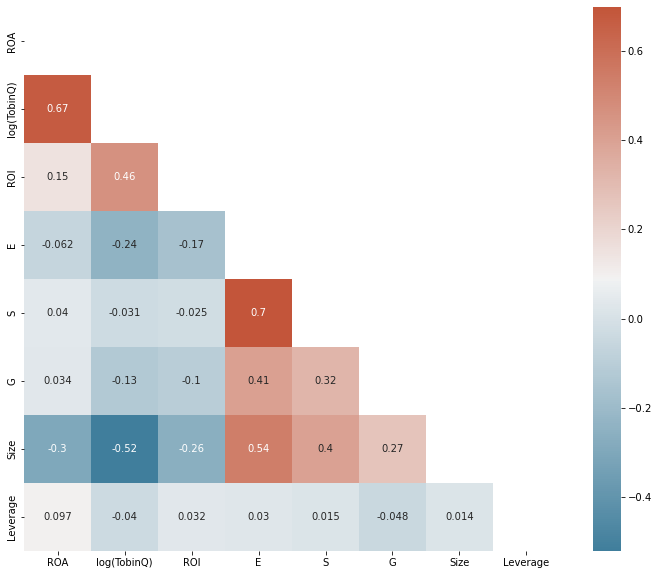

In [33]:
df = pd.DataFrame({'ROA': mergedDf['ROA_2018'].astype(float), "log(TobinQ)" : mergedDf["log(TobinQ)_2018"].astype(float) , 'ROI' : mergedDf['ROI_2018'].astype(float), 'E' : mergedDf['2017 (E)'].astype(float) , 'S' : mergedDf['2017 (S)'].astype(float),'G' : mergedDf['2017 (G)'].astype(float) , 'Size' : mergedDf['Size_2017'].astype(float) , 'Leverage' : mergedDf['Leverage_2017'].astype(float) })
corr = df.corr()
f , ax = plt.subplots(figsize= (12,10))
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20,as_cmap = True)
sns.heatmap(corr,annot=True,mask = mask, cmap=cmap)

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - ROA | independent variable -> E, Size, Lev

In [34]:
#Building ordinary least squares (OLS) multiple regression analysis
#Dependent Variable - ROA | independent variable E
X = mergedDf[["2017 (E)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["ROA_2018"].astype(float)
model1 = sm.OLS(Y, X).fit()
summary = model1.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:               ROA_2018   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.505
Method:                 Least Squares   F-statistic:                              145.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    1.67e-64
Time:                        16:55:30   Log-Likelihood:                          500.43
No. Observations:                 423   AIC:                                     -994.9
Df Residuals:                     420   BIC:                                     -982.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - ROA | independent variable -> S, Size, Leverage

In [35]:
X = mergedDf[["2017 (S)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["ROA_2018"].astype(float)
model2 = sm.OLS(Y, X).fit()
summary = model2.summary()
print(summary)


                                 OLS Regression Results                                
Dep. Variable:               ROA_2018   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                              152.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    7.72e-67
Time:                        16:55:30   Log-Likelihood:                          505.86
No. Observations:                 423   AIC:                                     -1006.
Df Residuals:                     420   BIC:                                     -993.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - ROA | independent variable -> G, Size, Leverage

In [36]:
X = mergedDf[["2017 (G)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["ROA_2018"].astype(float)
model3 = sm.OLS(Y, X).fit()
summary = model3.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:               ROA_2018   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              153.9
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    2.74e-67
Time:                        16:55:30   Log-Likelihood:                          506.91
No. Observations:                 423   AIC:                                     -1008.
Df Residuals:                     420   BIC:                                     -995.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - ROI | independent variable -> E, Size, Leverage.

In [37]:
X = mergedDf[["2017 (E)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["ROI_2018"].astype(float)
model4 = sm.OLS(Y, X).fit()
summary = model4.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:               ROI_2018   R-squared (uncentered):                   0.037
Model:                            OLS   Adj. R-squared (uncentered):              0.030
Method:                 Least Squares   F-statistic:                              5.381
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                     0.00121
Time:                        16:55:30   Log-Likelihood:                          5.7452
No. Observations:                 423   AIC:                                     -5.490
Df Residuals:                     420   BIC:                                      6.652
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - ROI | independent variable -> S , Size, Leverage.

In [38]:
X = mergedDf[["2017 (S)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["ROI_2018"].astype(float)
model5 = sm.OLS(Y, X).fit()
summary = model5.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:               ROI_2018   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.025
Method:                 Least Squares   F-statistic:                              4.681
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                     0.00314
Time:                        16:55:30   Log-Likelihood:                          4.7247
No. Observations:                 423   AIC:                                     -3.449
Df Residuals:                     420   BIC:                                      8.693
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - ROI | independent variable -> G, Size, Leverage


In [39]:
X = mergedDf[["2017 (G)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["ROI_2018"].astype(float)
model6 = sm.OLS(Y, X).fit()
summary = model6.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:               ROI_2018   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              3.629
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                      0.0131
Time:                        16:55:30   Log-Likelihood:                          3.1808
No. Observations:                 423   AIC:                                    -0.3617
Df Residuals:                     420   BIC:                                      11.78
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - log(TobinQ) | independent variable -> E, Size, Leverage.


In [40]:
X = mergedDf[["2017 (E)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["log(TobinQ)_2018"].astype(float)
model7 = sm.OLS(Y, X).fit()
summary = model7.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:       log(TobinQ)_2018   R-squared (uncentered):                   0.088
Model:                            OLS   Adj. R-squared (uncentered):              0.081
Method:                 Least Squares   F-statistic:                              13.49
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    2.02e-08
Time:                        16:55:30   Log-Likelihood:                         -533.44
No. Observations:                 423   AIC:                                      1073.
Df Residuals:                     420   BIC:                                      1085.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - log(TobinQ) | independent variable -> S, Size, Leverage


In [41]:
X = mergedDf[["2017 (S)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["log(TobinQ)_2018"].astype(float)
model8 = sm.OLS(Y, X).fit()
summary = model8.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:       log(TobinQ)_2018   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.094
Method:                 Least Squares   F-statistic:                              15.67
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    1.12e-09
Time:                        16:55:30   Log-Likelihood:                         -530.46
No. Observations:                 423   AIC:                                      1067.
Df Residuals:                     420   BIC:                                      1079.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Building ordinary least squares (OLS) multiple regression analysis.
Dependent Variable - log(TobinQ) | independent variable -> G, Size, Leverage.


In [42]:
X = mergedDf[["2017 (G)","Size_2017","Leverage_2017"]].astype(float)
Y = mergedDf["log(TobinQ)_2018"].astype(float)
model9 = sm.OLS(Y, X).fit()
summary = model9.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:       log(TobinQ)_2018   R-squared (uncentered):                   0.077
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              11.60
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    2.55e-07
Time:                        16:55:30   Log-Likelihood:                         -536.05
No. Observations:                 423   AIC:                                      1078.
Df Residuals:                     420   BIC:                                      1090.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Summary for regressions on ROA

In [43]:
#effect of E/S/G on ROA
print(summary_col([model1,model2,model3],stars=True))


               ROA_2018 I ROA_2018 II ROA_2018 III
--------------------------------------------------
2017 (E)       -0.0001                            
               (0.0001)                           
2017 (G)                              0.0007***   
                                      (0.0002)    
2017 (S)                  0.0007***               
                          (0.0002)                
Leverage_2017  0.0451***  0.0450***   0.0469***   
               (0.0139)   (0.0137)    (0.0137)    
R-squared      0.5089     0.5213      0.5237      
R-squared Adj. 0.5053     0.5179      0.5203      
Size_2017      0.0066***  0.0020      0.0017      
               (0.0010)   (0.0014)    (0.0013)    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Summary for regressions on ROI

In [44]:
#effect of E/S/G on ROI
print(summary_col([model4,model5,model6],stars=True))
 


               ROI_2018 I ROI_2018 II ROI_2018 III
--------------------------------------------------
2017 (E)       -0.0011**                          
               (0.0005)                           
2017 (G)                              0.0000      
                                      (0.0006)    
2017 (S)                  0.0011*                 
                          (0.0006)                
Leverage_2017  0.0643     0.0663      0.0670      
               (0.0448)   (0.0449)    (0.0450)    
R-squared      0.0370     0.0324      0.0253      
R-squared Adj. 0.0301     0.0254      0.0183      
Size_2017      -0.0001    -0.0128***  -0.0060     
               (0.0032)   (0.0044)    (0.0044)    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Summary for regressions on log(TobinQ)

In [45]:
#effect of E/S/G on log(TobinQ)
print(summary_col([model7,model8,model9],stars=True))




               log(TobinQ)_2018 I log(TobinQ)_2018 II log(TobinQ)_2018 III
--------------------------------------------------------------------------
2017 (E)       -0.0049***                                                 
               (0.0017)                                                   
2017 (G)                                              0.0040*             
                                                      (0.0022)            
2017 (S)                          0.0087***                               
                                  (0.0023)                                
Leverage_2017  0.1546             0.1619              0.1761              
               (0.1601)           (0.1589)            (0.1611)            
R-squared      0.0879             0.1006              0.0765              
R-squared Adj. 0.0814             0.0942              0.0699              
Size_2017      0.0447***          -0.0362**           -0.0076             
               (0.0114) 

FINDING:

Environment score has negative relation with accounting-based financial performance
Social and Governance score have positive relation with accounting-based financial performance. Social score have stronger relation compared to governance score.

Overall, E brings negative effect to financial performance while S and G brings positive effect to financial performance. S has most positive relation with financial performace.
